# 1. Input Data

In [2]:
import pandas as pd

# CSV 파일 불러오기
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev8.csv')

# "column1"과 "column3" 열만 가져오기
data = basic_data[['Output_Velocity','Pressure','Voltage','Z']]

# 가져온 열의 내용 출력
print(data)


     Output_Velocity  Pressure  Voltage          Z
0           0.000000       0.0       40   1.517081
1           0.000000       1.0       40   1.517081
2           0.000000       2.0       40   1.517081
3           0.000000       3.0       40   1.517081
4           0.433423       0.0       42   1.517081
..               ...       ...      ...        ...
358         6.099118       1.0       40  17.801203
359         5.771092       2.0       40  17.801203
360         6.772376       0.0       42  17.801203
361         6.660525       1.0       42  17.801203
362         6.323895       2.0       42  17.801203

[363 rows x 4 columns]


In [3]:
#맨끝에 열을 'Pandas_ unique' 함수로 Taget 데이터로 변환
print(pd.unique(data['Output_Velocity']))


[0.         0.43342345 0.28823197 0.23015538 0.97009417 0.85824296
 0.83673311 0.64852193 1.45299026 1.36910186 1.32500667 1.18626814
 2.08860629 2.03590716 1.99826492 1.74767519 2.79520481 2.79950678
 2.81994114 2.52633171 3.50395432 3.54482303 3.61580553 3.38672564
 4.19334496 4.26755394 4.3869336  4.21270383 0.76037314 0.74639174
 0.67648473 0.32479871 1.40674409 1.40351761 1.38953621 1.16475829
 0.75499568 1.97567958 1.97783057 2.00364239 1.84984697 1.53042572
 2.50267087 2.50159538 2.55214352 2.45427371 2.16281526 2.97158557
 2.98986894 3.06192693 2.9952464  2.74143019 3.41361296 3.45340617
 3.54052106 3.49535038 3.25336458 3.82982852 3.87177273 3.97179352
 3.95673663 3.72658125 4.25142155 4.35574432 4.52352114 4.58805068
 4.3008942  1.35404496 1.13679549 0.96149023 0.45063133 1.95094326
 1.75950561 1.60571019 1.20562701 0.8948097  2.51342579 2.39297064
 2.25423212 1.91330102 1.67669269 3.13936239 2.96835909 2.80811072
 2.40372557 3.61903201 3.47921799 3.34370595 3.13183394 3.0189

In [4]:
# 특성값 추출 > Input Data
data_input=data[['Pressure','Voltage','Z']].to_numpy()
print((data_input[:5]))

[[ 0.         40.          1.51708144]
 [ 1.         40.          1.51708144]
 [ 2.         40.          1.51708144]
 [ 3.         40.          1.51708144]
 [ 0.         42.          1.51708144]]


In [5]:
# 마지막 열 > Target Data 
data_target = data['Output_Velocity'].to_numpy()

# 2. AI model training

#### Model
- Hyperparameter tunning


In [6]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 나머지를 분리
train_input, temp_input, train_target, temp_target = train_test_split(
    data_input, data_target, test_size=0.4,
)

# 나머지에서 검증 세트와 테스트 세트를 분리
val_input, test_input, val_target, test_target = train_test_split(
    temp_input, temp_target, test_size=0.5
)

# 여기서는 표준화 과정이 빠져 있기 때문에 해당 과정을 추가
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
val_scaled = scaler.transform(val_input)
test_scaled = scaler.transform(test_input)

# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='distance')
knr.fit(train_scaled, train_target)

# 모델 평가
train_score = knr.score(train_scaled, train_target)
val_score = knr.score(val_scaled, val_target)
test_score = knr.score(test_scaled, test_target)

print("Training Score:", train_score)
print("Validation Score:", val_score)
print("Testing Score:", test_score)

Training Score: 1.0
Validation Score: 0.7818594104180787
Testing Score: 0.8180008134584711


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 예측값 생성 
predictions = knr.predict(test_scaled)

# 1. 평균 제곱 오차 (MSE)
mse = mean_squared_error(test_target, predictions)
print("MSE:", mse)

# 2. 평균 절대 오차 (MAE)
mae = mean_absolute_error(test_target, predictions)
print("MAE:", mae)

# 3. 루트 평균 제곱 오차 (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 0.9553792395504834
MAE: 0.7153501552883741
RMSE: 0.9774350308590763


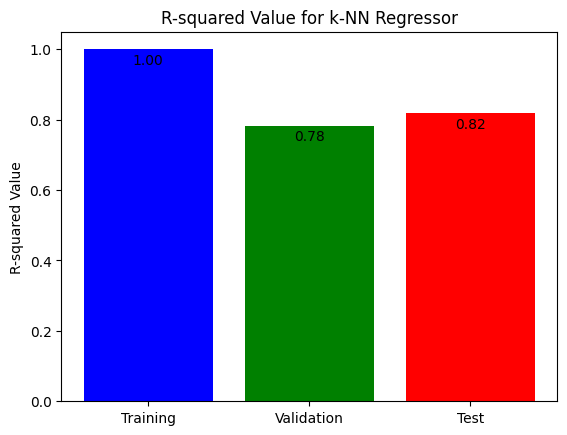

In [8]:
import matplotlib.pyplot as plt

# R-제곱 값을 계산
training_r2 = knr.score(train_scaled, train_target)
val_r2 = knr.score(val_scaled, val_target)
test_r2 = knr.score(test_scaled, test_target)

# 데이터를 준비
labels = ['Training', 'Validation', 'Test']
r2_values = [training_r2, val_r2, test_r2]

# 바 차트를 생성
plt.bar(labels, r2_values, color=['blue', 'green', 'red'])

# 플롯에 레이블을 추가
plt.ylabel('R-squared Value')
plt.title('R-squared Value for k-NN Regressor')

for i, value in enumerate(r2_values):
    plt.text(i, value - 0.05 if value > 0.5 else value + 0.03, f'{value:.2f}', ha='center', va='bottom')

plt.show()

# 3. Output Data

In [9]:
# 테스트 데이터에 대한 예측값 구하기
test_predictions = knr.predict(test_scaled)

# 예측값 출력
print("테스트 예측값:", test_predictions)


테스트 예측값: [5.99047998 4.24686374 3.15490247 0.86413968 5.01384382 3.89702734
 4.96014509 4.52757108 3.87256691 5.82458591 5.75186598 3.01079942
 0.85845016 2.74358117 1.45527315 0.31375104 1.5422499  1.59982332
 3.89435511 7.04166797 5.93414905 3.62750637 5.9033177  3.1233644
 6.2234584  3.0591273  6.38643427 2.03224748 2.94517901 2.07582753
 5.40003332 0.55932784 5.95414003 2.23517215 4.19524745 1.01670454
 6.10764518 3.82427286 5.9362418  0.92390158 1.37166289 3.14672874
 3.00770418 1.89429224 5.37735775 1.18735667 5.46781991 0.66039815
 5.12425752 3.96203529 2.00228082 5.67455172 3.82243377 6.41269625
 3.59608767 5.77983017 1.74150264 3.0766186  5.44451751 2.44464796
 0.2285151  2.3968059  2.00328288 5.32960775 4.7409312  2.33828137
 3.36917736 3.94469401 3.0680726  2.07633302 4.4500762  5.64288214
 4.19655644]


In [11]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 상관 계수를 계산
train_corr, _ = pearsonr(train_predictions, train_target)
test_corr, _ = pearsonr(test_predictions, test_target)

# 데이터를 준비
labels = ['Training', 'Test']
corr_values = [train_corr, test_corr]

# 바 차트를 생성
plt.bar(labels, corr_values, color=['blue', 'green'])

# 플롯에 레이블을 추가
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient for k-NN Regressor')

# 각 바 위에 값들을 추가
for i, value in enumerate(corr_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

NameError: name 'train_predictions' is not defined

## Prediction Data 

In [213]:
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('c:/lsy_DL/0. TestData_rev8.csv')

# "Pressure", "Voltage", "Z" 열만 가져오기
new_data_sample = data[['Pressure','Voltage','Z']]

# 데이터 샘플을 스케일링
new_data_sample_scaled = scaler.transform(new_data_sample)

# 스케일링된 데이터 샘플에 대한 예측을 수행
prediction = knr.predict(new_data_sample_scaled)

# 예측된 값을 'Prediction' 열로 추가
new_data_sample['Prediction'] = prediction

# DataFrame을 CSV 파일로 저장
new_data_sample.to_csv('output_file8.csv', index=False)


c:\Users\user\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [214]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, n_jobs=1, verbose=1)

# 튜닝 시작
grid_search.fit(train_scaled, train_target)

# 최적의 하이퍼파라미터와 그 때의 점수 출력
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 최적의 하이퍼파라미터로 훈련된 모델 추출
best_knr = grid_search.best_estimator_

# 모델 평가
train_score = best_knr.score(train_scaled, train_target)
test_score = best_knr.score(test_scaled, test_target)

print("Training Score with Best Parameters:", train_score)
print("Testing Score with Best Parameters:", test_score)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.8039901765583506
Training Score with Best Parameters: 1.0
Testing Score with Best Parameters: 0.8396439033328006


In [40]:

import tensorflow as tf
def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    # 예: y_true 값이 10 이상일 때의 오차에 2배의 가중치를 부여
    penalty = tf.where(y_true > 10, tf.square(y_true - y_pred), 0)
    return mse + tf.reduce_mean(penalty)

# Rev2

In [96]:
import pandas as pd

# CSV 파일 불러오기
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev8.csv')

# "column1"과 "column3" 열만 가져오기
data = basic_data[['Output_Velocity','Pressure','Voltage','Z','Error']]

# 가져온 열의 내용 출력
print(data)

#맨끝에 열을 'Pandas_ unique' 함수로 Taget 데이터로 변환
print(pd.unique(data['Output_Velocity']))

# 특성값 추출 > Input Data
data_input=data[['Pressure','Voltage','Z', 'Error']].to_numpy()
print((data_input[:5]))

# 마지막 열 > Target Data 
data_target = data['Output_Velocity'].to_numpy()


     Output_Velocity  Pressure  Voltage          Z     Error
0                0.0       0.0       22   1.517081  0.000000
1                0.0       1.0       22   1.517081  0.000000
2                0.0       2.0       22   1.517081  0.000000
3                0.0       3.0       22   1.517081  0.000000
4                0.0       0.0       24   1.517081  0.000000
..               ...       ...      ...        ...       ...
573              0.0       1.0       52  17.801203  0.000000
574              0.0       2.0       52  17.801203  0.173856
575              0.0       0.0       54  17.801203  0.000000
576              0.0       1.0       54  17.801203  0.000000
577              0.0       2.0       54  17.801203  0.000000

[578 rows x 5 columns]
[0.         0.43342345 0.28823197 0.23015538 0.97009417 0.85824296
 0.83673311 0.64852193 1.45299026 1.36910186 1.32500667 1.18626814
 2.08860629 2.03590716 1.99826492 1.74767519 2.79520481 2.79950678
 2.81994114 2.52633171 3.50395432 3.5448230

In [100]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 나머지를 분리
train_input, temp_input, train_target, temp_target = train_test_split(
    data_input, data_target, test_size=0.4
)

# 나머지에서 검증 세트와 테스트 세트를 분리
val_input, test_input, val_target, test_target = train_test_split(
    temp_input, temp_target, test_size=0.5
)

# 여기서는 표준화 과정이 빠져 있기 때문에 해당 과정을 추가
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
val_scaled = scaler.transform(val_input)
test_scaled = scaler.transform(test_input)

# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(metric='euclidean', n_neighbors=3, weights='distance')
knr.fit(train_scaled, train_target)

# 모델 평가
train_score = knr.score(train_scaled, train_target)
val_score = knr.score(val_scaled, val_target)
test_score = knr.score(test_scaled, test_target)

print("Training Score:", train_score)
print("Validation Score:", val_score)
print("Testing Score:", test_score)

Training Score: 1.0
Validation Score: 0.6076328752724377
Testing Score: 0.5962722644648553


In [101]:
# 테스트 데이터에 대한 예측값 구하기
test_predictions = knr.predict(test_scaled)


# 예측값 출력
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('c:/lsy_DL/0. TestData_rev8.csv')

# "Pressure", "Voltage", "Z" 열만 가져오기
new_data_sample = data[['Pressure','Voltage','Z', 'Error']]

# 데이터 샘플을 스케일링
new_data_sample_scaled = scaler.transform(new_data_sample)

# 스케일링된 데이터 샘플에 대한 예측을 수행
prediction = knr.predict(new_data_sample_scaled)

# 예측된 값을 'Prediction' 열로 추가
new_data_sample['Prediction'] = prediction

# DataFrame을 CSV 파일로 저장
new_data_sample.to_csv('output_file8.csv', index=False)

c:\Users\user\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [102]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, n_jobs=1, verbose=1)

# 튜닝 시작
grid_search.fit(train_scaled, train_target)

# 최적의 하이퍼파라미터와 그 때의 점수 출력
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 최적의 하이퍼파라미터로 훈련된 모델 추출
best_knr = grid_search.best_estimator_

# 모델 평가
train_score = best_knr.score(train_scaled, train_target)
val_score = knr.score(val_scaled, val_target)
test_score = best_knr.score(test_scaled, test_target)

print("Training Score with Best Parameters:", train_score)
print("Validation Score:", val_score)
print("Testing Score with Best Parameters:", test_score)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.5839955173493592
Training Score with Best Parameters: 1.0
Validation Score: 0.6076328752724377
Testing Score with Best Parameters: 0.6396922565514429


#  Rev3

## 보정계수 찾아내는 코드
- 목적함수:SVM_Regression 모델에 대한 보정계수

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

epsilon = 1e-10  # 분모가 0이 되는 것을 방지하기 위한 아주 작은 값

# 데이터 불러오기
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev9.csv')
data = basic_data[['Output_Velocity','Pressure','Voltage','Viscosity', 'Surface Tension', 'Density']]

# 입력, 타겟 데이터 변환
data_input = data[['Pressure','Voltage','Viscosity','Surface Tension', 'Density']].to_numpy()
data_target = data['Output_Velocity'].to_numpy()

# 데이터 분리
train_input, temp_input, train_target, temp_target = train_test_split(
    data_input, data_target, test_size=0.4, random_state=42
)
val_input, test_input, val_target, test_target = train_test_split(
    temp_input, temp_target, test_size=0.5, random_state=42
)

# 데이터 표준화
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
val_scaled = scaler.transform(val_input)
test_scaled = scaler.transform(test_input)

# 모델 훈련
svm_regressor = SVR(C=100, epsilon=0.1, kernel='rbf')
svm_regressor.fit(train_scaled, train_target)

# 역 최적화를 위한 목적 함수 정의
# epsilon = 1e-10  # 분모가 0이 되는 것을 방지하기 위한 아주 작은 값
def inverse_objective_function(x_scaled, y_target):
    y_pred = svm_regressor.predict([x_scaled])
    # 상대 오차 계산
    relative_error = abs(y_pred - y_target) / (abs(y_target) + epsilon)
    return relative_error[0]

# 주어진 y_target 값에 대해 최적의 x를 찾기
y_target = data_target[0]  # 첫 번째 Output_Velocity 값으로 설정
x0_scaled = scaler.transform([[1, 1, 1, 1, 1]])  # 초기 추정값. 임의로 설정
result = minimize(inverse_objective_function, x0=x0_scaled[0], args=(y_target,))
x_optimal_scaled = result.x

# 스케일링 된 값을 원래의 값으로 변환
x_optimal = scaler.inverse_transform([x_optimal_scaled])

print(f"Optimal x for y_target {y_target} is {x_optimal[0]}")


## 보정계수 찾아내는 코드
- 목적함수:다항식 보정공식에 대한 보정계수

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

epsilon = 1e-10  # Avoid division by zero

# Data loading
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev10.csv')
data = basic_data[['Output_Velocity','Pressure','Voltage','Viscosity', 'Surface Tension', 'Density']]

# Extracting input and target data
data_input = data[['Pressure','Voltage','Viscosity','Surface Tension', 'Density']].to_numpy()
data_target = data['Output_Velocity'].to_numpy()

# Polynomial correction function for 2nd order
def polynomial_correction_function(x, coefficients):
    a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t = coefficients
    return (
        a + 
        b*x[0] + c*x[1] + d*x[2] + e*x[3] + f*x[4] + 
        g*x[0]**2 + h*x[1]**2 + i*x[2]**2 + j*x[3]**2 + k*x[4]**2 + 
        l*x[0]*x[1] + m*x[0]*x[2] + n*x[0]*x[3] + o*x[0]*x[4] + 
        p*x[1]*x[2] + q*x[1]*x[3] + r*x[1]*x[4] + 
        s*x[2]*x[3] + t*x[2]*x[4]
    )

# Objective function for optimization
def objective_function(coefficients, data_input, data_target):
    predictions = np.apply_along_axis(polynomial_correction_function, 1, data_input, coefficients)
    relative_errors = np.abs(predictions - data_target) / (np.abs(data_target) + epsilon)
    return np.mean(relative_errors)

# Initial guess for coefficients
initial_coefficients = [1] * 20

# Find optimal coefficients
result = minimize(objective_function, x0=initial_coefficients, args=(data_input, data_target))
optimal_coefficients = result.x

# Create a DataFrame to store the optimal coefficients
coefficients_df = pd.DataFrame([optimal_coefficients], columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't'])

# Save the coefficients to a new CSV file
coefficients_df.to_csv('c:/lsy_DL/output_file10_5. SVM[Velocity_Factor_Poly].csv', index=False)

print("Coefficients saved!")

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

epsilon = 1e-10  # Avoid division by zero

# Data loading
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev10_velocity.csv')
data_target = basic_data['Output_Velocity'].to_numpy()
data_input = basic_data.drop('Output_Velocity', axis=1).to_numpy()

# Create polynomial features dynamically
def polynomial_correction_function(x, coefficients):
    linear_terms = np.dot(coefficients[:len(x)], x)
    squared_terms = np.dot(coefficients[len(x):2*len(x)], x**2)
    interaction_terms = sum([coefficients[2*len(x) + i] * x[i] * x[j] for i in range(len(x)) for j in range(i+1, len(x))])
    return linear_terms + squared_terms + interaction_terms

# Objective function for optimization
def objective_function(coefficients, data_input, data_target):
    predictions = np.apply_along_axis(polynomial_correction_function, 1, data_input, coefficients)
    relative_errors = np.abs(predictions - data_target) / (np.abs(data_target) + epsilon)
    return np.mean(relative_errors)

num_features = data_input.shape[1]
# Initial guess for coefficients
initial_coefficients = [1] * (2*num_features + (num_features*(num_features-1))//2)

# Find optimal coefficients
result = minimize(objective_function, x0=initial_coefficients, args=(data_input, data_target))
optimal_coefficients = result.x

# Create a DataFrame to store the optimal coefficients
coefficients_columns = ['Output_Velocity'] + ['a' + str(i) for i in range(len(optimal_coefficients))]
coefficients_data = np.concatenate(([data_target[0]], optimal_coefficients)).reshape(1, -1)
coefficients_df = pd.DataFrame(coefficients_data, columns=coefficients_columns)

# Save the coefficients to a new CSV file
coefficients_df.to_csv('c:/lsy_DL/output_file10_5. SVM[Velocity_Factor_Poly1].csv', index=False)

print("Coefficients saved!")

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

epsilon = 1e-10  # Avoid division by zero

# Data loading
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev10_velocity.csv')

# Create polynomial features dynamically
def polynomial_correction_function(x, coefficients):
    linear_terms = np.dot(coefficients[:len(x)], x)
    squared_terms = np.dot(coefficients[len(x):2*len(x)], x**2)
    interaction_terms = sum([coefficients[2*len(x) + i] * x[i] * x[j] for i in range(len(x)) for j in range(i+1, len(x))])
    return linear_terms + squared_terms + interaction_terms

# Objective function for optimization
def objective_function(coefficients, data_input, data_target):
    predictions = np.apply_along_axis(polynomial_correction_function, 1, data_input, coefficients)
    relative_errors = np.abs(predictions - data_target) / (np.abs(data_target) + epsilon)
    return np.mean(relative_errors)

num_features = basic_data.shape[1] - 1  # Subtract one for 'Output_Velocity'
# Initial guess for coefficients
initial_coefficients = [1] * (2*num_features + (num_features*(num_features-1))//2)

coefficients_list = []

for i in range(len(basic_data)):
    data_target = basic_data.iloc[i]['Output_Velocity']
    data_input_values = basic_data.drop('Output_Velocity', axis=1).iloc[i].to_numpy()
    
    result = minimize(objective_function, x0=initial_coefficients, args=(data_input_values.reshape(1,-1), data_target))
    optimal_coefficients = result.x

    # Store the Output_Velocity, the related features, and the optimal coefficients for this data point
    coefficients_list.append([data_target] + list(data_input_values) + list(optimal_coefficients))

# Convert the list to a DataFrame
coefficients_columns = ['Output_Velocity'] + list(basic_data.drop('Output_Velocity', axis=1).columns) + ['a' + str(i) for i in range(len(optimal_coefficients))]
coefficients_df = pd.DataFrame(coefficients_list, columns=coefficients_columns)

# Save the coefficients to a new CSV file
coefficients_df.to_csv('c:/lsy_DL/output_file10_5. SVM[Velocity_Factor_Poly2].csv', index=False)

print("Coefficients saved!")

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd

epsilon = 1e-10  # Avoid division by zero

# Data loading
basic_data = pd.read_csv('c:/lsy_DL/0. TestData_rev10_velocity.csv')

# Create polynomial features dynamically
def polynomial_correction_function(x, coefficients):
    num_features = len(x)
    linear_terms = np.dot(coefficients[:num_features], x)
    squared_terms = np.dot(coefficients[num_features:2*num_features], x**2)
    interaction_terms = sum([coefficients[2*num_features + i] * x[i] * x[j] for i in range(num_features) for j in range(i+1, num_features)])
    return linear_terms + squared_terms + interaction_terms

# Objective function for optimization
def objective_function(coefficients, data_input, data_target):
    predictions = np.apply_along_axis(polynomial_correction_function, 1, data_input, coefficients)
    relative_errors = np.abs(predictions - data_target) / (np.abs(data_target) + epsilon)
    return np.mean(relative_errors)

num_features = basic_data.shape[1] - 1  # Subtract one for 'Output_Velocity'
# Initial guess for coefficients
initial_coefficients = [1] * (2*num_features + (num_features*(num_features-1))//2)

coefficients_list = []

for i in range(len(basic_data)):
    data_target = basic_data.iloc[i]['Output_Velocity']
    data_input_values = basic_data.drop('Output_Velocity', axis=1).iloc[i].to_numpy()
    
    result = minimize(objective_function, x0=initial_coefficients, args=(data_input_values.reshape(1,-1), np.array([data_target])))
    optimal_coefficients = result.x

    # Store the Output_Velocity, the related features, and the optimal coefficients for this data point
    coefficients_list.append([data_target] + list(data_input_values) + list(optimal_coefficients))

# Convert the list to a DataFrame
coefficients_columns = ['Output_Velocity'] + list(basic_data.drop('Output_Velocity', axis=1).columns) + ['a' + str(i) for i in range(len(optimal_coefficients))]
coefficients_df = pd.DataFrame(coefficients_list, columns=coefficients_columns)

# Save the coefficients to a new CSV file
coefficients_df.to_csv('c:/lsy_DL/output_file10_5. SVM[Velocity_Factor_Poly3].csv', index=False)

print("Coefficients saved!")